# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
import requests

url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
replaceUrl = url.replace(" ", "%20")
city_weather = requests.get(replaceUrl).json()
city_weather

{'coord': {'lon': -175.2, 'lat': -21.2},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 295.15,
  'feels_like': 294.63,
  'temp_min': 295.15,
  'temp_max': 295.15,
  'pressure': 1018,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 4.1, 'deg': 110},
 'clouds': {'all': 40},
 'dt': 1593893246,
 'sys': {'type': 1,
  'id': 7285,
  'country': 'TO',
  'sunrise': 1593973126,
  'sunset': 1594012314},
 'timezone': 46800,
 'id': 4032243,
 'name': 'Vaini',
 'cod': 200}

In [5]:
print('Beginning Data Retrieval')
print('~~~~~~~~~~~~~~~~~~~~~~~~')

# make counters
set_count = 1
record_count = 1
city_data = []

# loop through all the cities in the cities list
for i, city in enumerate (cities):
    #grouping cities in groups of 50
    if i%50 == 0 and i >= 50:
        set_count = set_count + 1
        record_count = 0
    #print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    
    city_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}'
    
    cityweather = requests.get(city_url).json()
    if "message" in cityweather:
        if cityweather["message"]=="city not found":
            print('Skipping... City not found')
    else:
        print(f'Processing Record {record_count} of Set {set_count} | {city}')
        record_count = record_count + 1
        citylat = cityweather['coord']['lat']
        citylong = cityweather['coord']['lon']
        maxtemp = cityweather['main']['temp_max']
        humidity = cityweather['main']['humidity']
        clouds = cityweather['clouds']['all']
        wind = cityweather['wind']['speed']
        country = cityweather['sys']['country']
        date = cityweather['dt']
        
        city_data.append({'City': city,
                         'Latitude': citylat,
                         'Longitude': citylong,
                         'Maximum Temperature': maxtemp,
                         'Humidity': humidity,
                         'Cloud Cover': clouds,
                         'Wind Speed': wind,
                         'Country': country,
                         'Date': date})
        
    #print(cityweather)
    

Beginning Data Retrieval
~~~~~~~~~~~~~~~~~~~~~~~~
Processing Record 1 of Set 1 | imbituba
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | beringovskiy
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ternova
Processing Record 11 of Set 1 | hambantota
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | kruisfontein
Processing Record 14 of Set 1 | palasa
Processing Record 15 of Set 1 | punta arenas
Skipping... City not found
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | bairiki
Skipping... City not found
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Se

Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | waitati
Processing Record 6 of Set 5 | belyy yar
Processing Record 7 of Set 5 | caravelas
Processing Record 8 of Set 5 | lufilufi
Processing Record 9 of Set 5 | adrar
Processing Record 10 of Set 5 | vila franca do campo
Processing Record 11 of Set 5 | juxtlahuaca
Processing Record 12 of Set 5 | saldanha
Processing Record 13 of Set 5 | qasigiannguit
Processing Record 14 of Set 5 | greenwood
Processing Record 15 of Set 5 | tazovskiy
Processing Record 16 of Set 5 | klaksvik
Processing Record 17 of Set 5 | faizabad
Processing Record 18 of Set 5 | tianpeng
Processing Record 19 of Set 5 | salalah
Skipping... City not found
Processing Record 20 of Set 5 | victoria
Processing Record 21 of Set 5 | mirpur khas
Processing Record 22 of Set 5 | korla
Processing Record 23 of Set 5 | treinta y tres
Processing Record 24 of Set 5 | meulaboh
Processing Record 25 of Set 5 | planos
Processing Record 

Processing Record 11 of Set 9 | lydenburg
Processing Record 12 of Set 9 | hualmay
Processing Record 13 of Set 9 | hami
Processing Record 14 of Set 9 | alpena
Processing Record 15 of Set 9 | hirara
Processing Record 16 of Set 9 | mandera
Processing Record 17 of Set 9 | mogadishu
Skipping... City not found
Processing Record 18 of Set 9 | de-kastri
Processing Record 19 of Set 9 | kintampo
Processing Record 20 of Set 9 | tiarei
Processing Record 21 of Set 9 | uray
Skipping... City not found
Processing Record 22 of Set 9 | little current
Processing Record 23 of Set 9 | aleksandrov gay
Processing Record 24 of Set 9 | dali
Processing Record 25 of Set 9 | sao jose da coroa grande
Processing Record 26 of Set 9 | lewistown
Skipping... City not found
Skipping... City not found
Processing Record 27 of Set 9 | soyo
Processing Record 28 of Set 9 | leningradskiy
Processing Record 29 of Set 9 | carora
Processing Record 30 of Set 9 | yelizovo
Skipping... City not found
Processing Record 31 of Set 9 | n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cityweather_df = pd.DataFrame(city_data)

cityweather_df

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Cover,Wind Speed,Country,Date
0,imbituba,-28.24,-48.67,293.15,49,0,5.10,BR,1593893246
1,yellowknife,62.46,-114.35,290.15,82,75,4.60,CA,1593893162
2,albany,42.60,-73.97,304.82,34,38,0.66,US,1593893247
3,beringovskiy,63.05,179.32,279.83,98,100,5.38,RU,1593893247
4,ribeira grande,38.52,-28.70,296.15,83,40,3.10,PT,1593893247
...,...,...,...,...,...,...,...,...,...
553,high prairie,55.43,-116.49,285.34,89,100,4.28,CA,1593893129
554,araouane,18.90,-3.53,311.36,8,82,4.96,ML,1593893315
555,altay,47.87,88.12,290.03,31,27,3.46,CN,1593893316
556,rudkobing,54.94,10.71,290.37,93,100,4.10,DK,1593893316


In [7]:
outputpath = 'output_cities.csv'
cityweather_df.to_csv(outputpath, index_label = 'City ID')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
cityweather_df.describe()

,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Cover,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,19.621810,10.742616,293.680000,68.145161,53.412186,3.605573,1.593893e+09
std,34.369348,92.143665,8.358501,21.562537,38.761740,2.151224,6.428007e+01
min,-54.800000,-179.170000,274.150000,1.000000,0.000000,0.190000,1.593893e+09
25%,-9.712500,-68.457500,287.150000,55.000000,16.000000,2.000000,1.593893e+09
50%,24.115000,15.445000,295.150000,73.000000,59.000000,3.100000,1.593893e+09
75%,49.827500,87.357500,300.195000,84.000000,90.750000,4.750000,1.593893e+09
max,78.220000,179.320000,313.440000,100.000000,100.000000,12.900000,1.593893e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
reallyhumid = cityweather_df[(cityweather_df['Humidity'] > 100)].index
reallyhumid

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

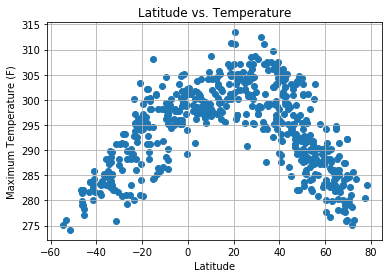

This plot shows the relationship between latitude and temperature on the globe. As expected, the temperature goes up the closer you get to the equator.


<Figure size 432x288 with 0 Axes>

In [27]:
scatterlat = cityweather_df['Latitude']
scatterhumid = cityweather_df['Humidity']
scattertemp = cityweather_df['Maximum Temperature']
scattercloud = cityweather_df['Cloud Cover']
scatterwind = cityweather_df['Wind Speed']
#------------------------------------------
plt.scatter(scatterlat, scattertemp, marker = 'o')
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.show()
plt.savefig('latvstemp.png')
print("This plot shows the relationship between latitude and temperature on the globe. As expected, the temperature goes up the closer you get to the equator.")

## Latitude vs. Humidity Plot

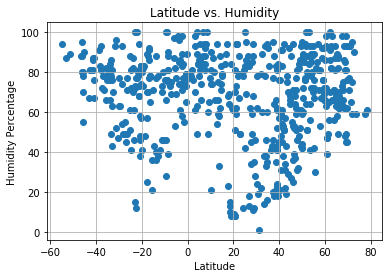

This plot shows the relationship between humidity and latitude. It seems like it gets more humid the farther you get from the equator.


<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(scatterlat, scatterhumid, marker = 'o')
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity Percentage")
plt.title("Latitude vs. Humidity")
plt.show()
print('This plot shows the relationship between humidity and latitude. It seems like it gets more humid the farther you get from the equator.')
plt.savefig('latvshum.png')

## Latitude vs. Cloudiness Plot

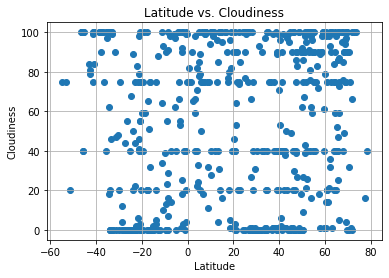

This plot shows the relationship between latitude and cloudiness. Seems like it gets cloudier toward the poles. 


<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(scatterlat, scattercloud, marker = 'o')
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.show()
print('This plot shows the relationship between latitude and cloudiness. Seems like it gets cloudier toward the poles. ')
plt.savefig('latvscloud.png')

## Latitude vs. Wind Speed Plot

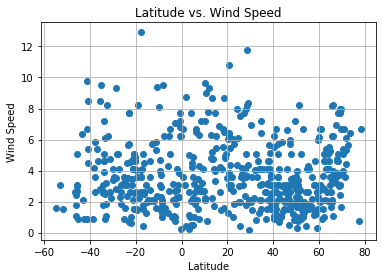

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(scatterlat, scatterwind, marker = 'o')
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.show()
"This plot shows the relationship of latitude and wind speed. This plot reflects that it gets windier as you get closer to the equator."
plt.savefig('latvswind.png')

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotLR(xvalues, yvalues):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues, yvalues)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northerndf = cityweather_df[cityweather_df['Latitude'] > 0]
southerndf = cityweather_df[cityweather_df['Latitude'] < 0]
northerndf

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Cover,Wind Speed,Country,Date
1,yellowknife,62.46,-114.35,290.15,82,75,4.60,CA,1593893162
2,albany,42.60,-73.97,304.82,34,38,0.66,US,1593893247
3,beringovskiy,63.05,179.32,279.83,98,100,5.38,RU,1593893247
4,ribeira grande,38.52,-28.70,296.15,83,40,3.10,PT,1593893247
6,kapaa,22.08,-159.32,300.15,78,20,3.60,US,1593893247
...,...,...,...,...,...,...,...,...,...
553,high prairie,55.43,-116.49,285.34,89,100,4.28,CA,1593893129
554,araouane,18.90,-3.53,311.36,8,82,4.96,ML,1593893315
555,altay,47.87,88.12,290.03,31,27,3.46,CN,1593893316
556,rudkobing,54.94,10.71,290.37,93,100,4.10,DK,1593893316


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

No handles with labels found to put in legend.


slope: -0.302338    intercept: 307.080102
R-squared: 0.514009
R-squared: 0.514009


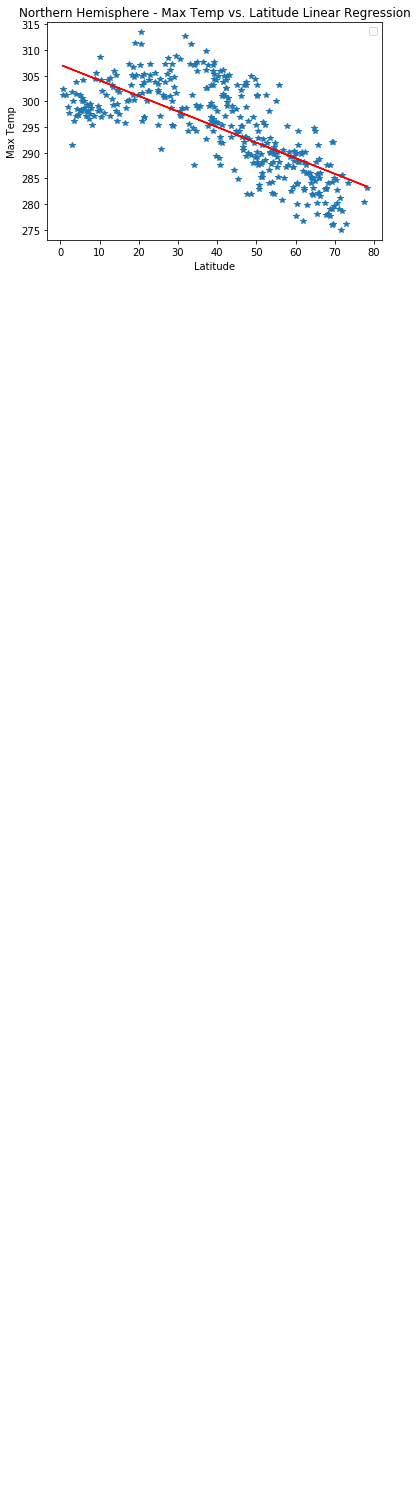

This plot shows the relationship between degrees in Kelvin and the latitude. The temperature is clearly higher toward the equator.


<Figure size 432x288 with 0 Axes>

In [19]:
northernmaxtemp = northerndf['Maximum Temperature']
northernlat = northerndf["Latitude"]
slope, intercept, r_value, p_value, std_err = linregress(northernlat, northernmaxtemp)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(northernlat, northernmaxtemp, "*")
plt.plot(northernlat, intercept + slope*northernlat, "r")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()
plt.savefig("NtempvsLLR.png")
print('This plot shows the relationship between degrees in Kelvin and the latitude. The temperature is clearly higher toward the equator.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

No handles with labels found to put in legend.


slope: 0.434837    intercept: 300.599634
R-squared: 0.603832
R-squared: 0.603832


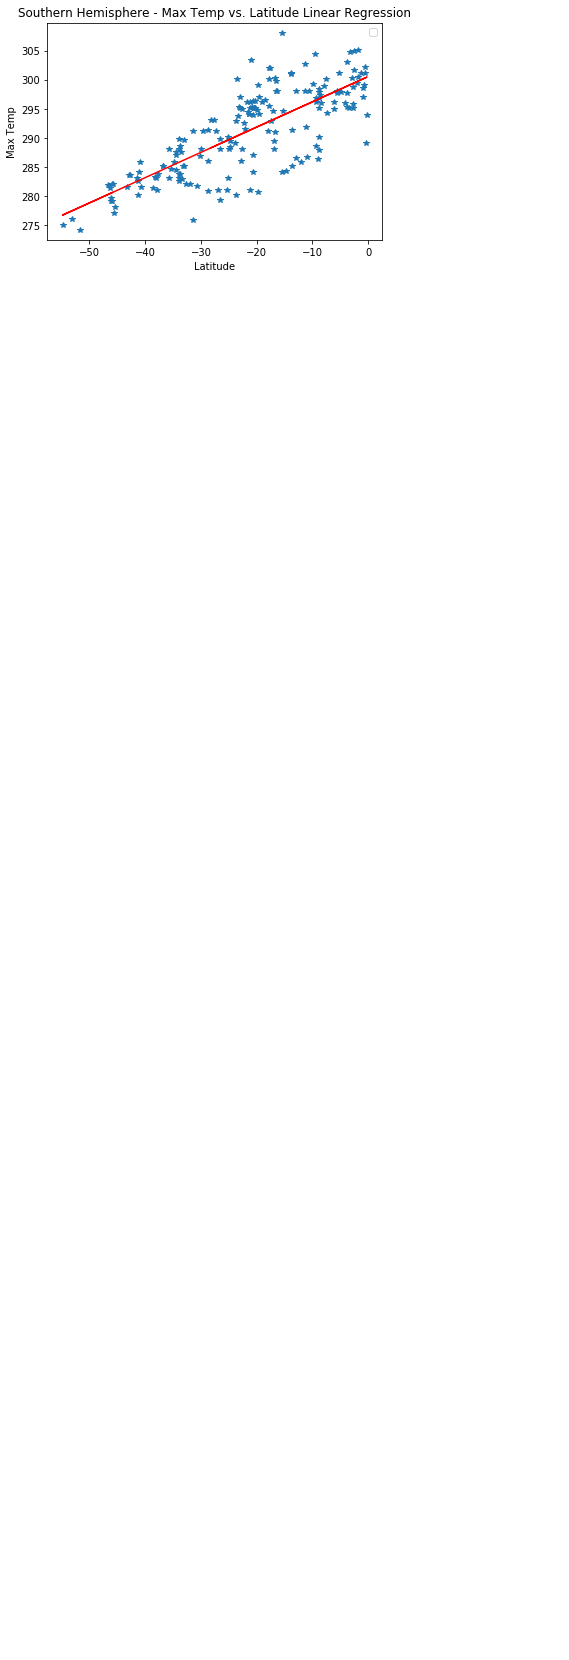

This graph reflects the temperature in Kelvin in relation to latitudes. This parallels the previous chart and shows that the temperature raises when you get closer to the equator.


<Figure size 432x288 with 0 Axes>

In [20]:
southernmaxtemp = southerndf['Maximum Temperature']
southernlat = southerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(southernlat, southernmaxtemp)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(southernlat, southernmaxtemp, "*")
plt.plot(southernlat, intercept + slope*southernlat, "r")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()
plt.savefig("StempvsLLR.png")
print('This graph reflects the temperature in Kelvin in relation to latitudes. This parallels the previous chart and shows that the temperature raises when you get closer to the equator.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

slope: 0.036023    intercept: 37.762538
R-squared: 0.001697


No handles with labels found to put in legend.


R-squared: 0.001697


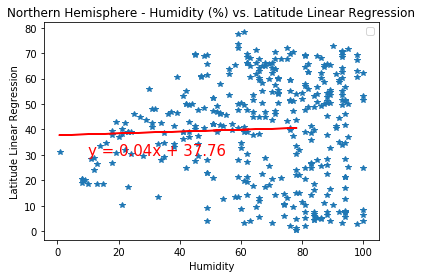

This plot shows relationship between humidity and latitude in the Northern Hemisphere. I dont think there is a clear trend.


<Figure size 432x288 with 0 Axes>

In [21]:
northernhumidity = northerndf['Humidity']
northernlat = northerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(northernhumidity, northernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(northernhumidity, northernlat, "*")
plt.plot(northernlat, intercept + slope*northernlat, "r")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()
plt.savefig("NHumidvsLLR.png")
print('This plot shows relationship between humidity and latitude in the Northern Hemisphere. I dont think there is a clear trend.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

No handles with labels found to put in legend.


slope: -0.070336    intercept: -16.698433
R-squared: 0.008635
R-squared: 0.008635


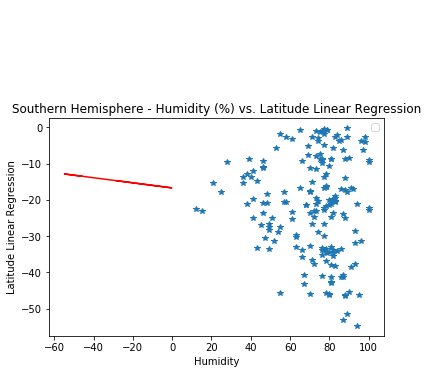

This plot shows relationship between humidity and latitude in the Southern Hemisphere. I dont think there is a clear trend.


<Figure size 432x288 with 0 Axes>

In [22]:
southernhumidity = southerndf['Humidity']
southernlat = southerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(southernhumidity, southernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(southernhumidity, southernlat, "*")
plt.plot(southernlat, intercept + slope*southernlat, "r")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()
plt.savefig("ShumidvsLLR.png")
print('This plot shows relationship between humidity and latitude in the Southern Hemisphere. I dont think there is a clear trend.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

No handles with labels found to put in legend.


slope: 0.000578    intercept: 40.115674
R-squared: 0.000001
R-squared: 0.000001


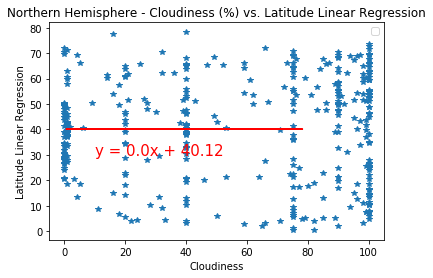

This plot shows relationship between cloudiness and latitude in the Northern Hemisphere. This looks like another one without a clear trend.


<Figure size 432x288 with 0 Axes>

In [23]:
northerncloudiness = northerndf['Cloud Cover']
northernlat = northerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(northerncloudiness, northernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(northerncloudiness, northernlat, "*")
plt.plot(northernlat, intercept + slope*northernlat, "r")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()
plt.savefig("NcloudvsLLR.png")
print('This plot shows relationship between cloudiness and latitude in the Northern Hemisphere. This looks like another one without a clear trend.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

slope: -0.062029    intercept: -18.806178
R-squared: 0.034011


No handles with labels found to put in legend.


R-squared: 0.034011


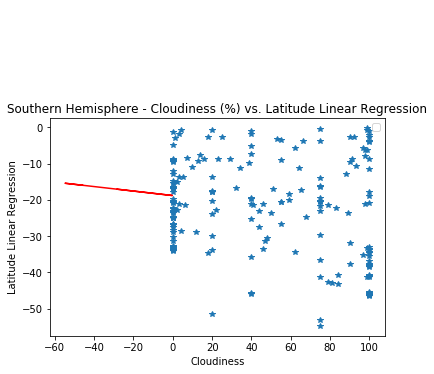

This plot shows relationship between cloudiness and latitude in the Southern Hemisphere. This looks like another one without a clear trend.


<Figure size 432x288 with 0 Axes>

In [24]:
southerncloudiness = southerndf['Cloud Cover']
southernlat = southerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(southerncloudiness, southernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(southerncloudiness, southernlat, "*")
plt.plot(southernlat, intercept + slope*southernlat, "r")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()
plt.savefig("SCloudvsLLR.png")
print('This plot shows relationship between cloudiness and latitude in the Southern Hemisphere. This looks like another one without a clear trend.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

slope: -0.804233    intercept: 43.032763
R-squared: 0.007118


No handles with labels found to put in legend.


R-squared: 0.007118


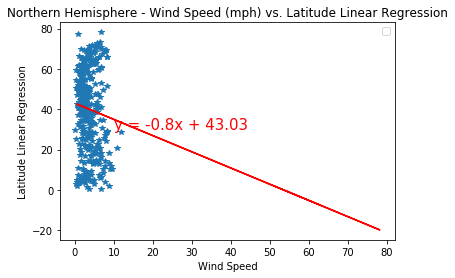

This plot shows relationship between wind speed and latitude in the Northern Hemisphere. Definitely seems to trend to be windier toward the equator.


<Figure size 432x288 with 0 Axes>

In [25]:
northwindspeed = northerndf['Wind Speed']
northernlat = northerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(northwindspeed, northernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(northwindspeed, northernlat, "*")
plt.plot(northernlat, intercept + slope*northernlat, "r")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()
plt.savefig("NWindvsLLR.png")
print('This plot shows relationship between wind speed and latitude in the Northern Hemisphere. Definitely seems to trend to be windier toward the equator.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

No handles with labels found to put in legend.


slope: -0.162904    intercept: -21.170241
R-squared: 0.000742
R-squared: 0.000742


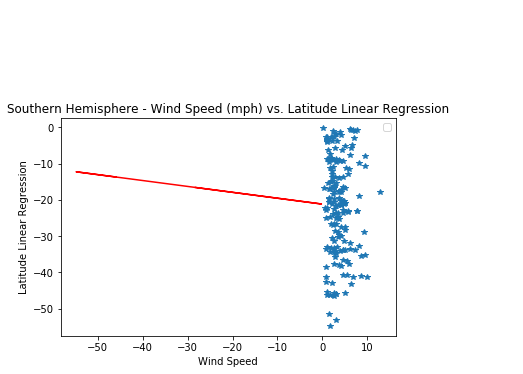

This plot shows relationship between wind speed and latitude in the Southern Hemisphere. Definitely seems to trend to be windier toward the equator.


<Figure size 432x288 with 0 Axes>

In [26]:
southwindspeed = southerndf['Wind Speed']
southernlat = southerndf['Latitude']
slope, intercept, r_value, p_value, std_err = linregress(southwindspeed, southernlat)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(southwindspeed, southernlat, "*")
plt.plot(southernlat, intercept + slope*southernlat, "r")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude Linear Regression")
plt.legend()
print("R-squared: %f" % r_value**2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.show()
plt.savefig("SWindvsLLR.png")
print('This plot shows relationship between wind speed and latitude in the Southern Hemisphere. Definitely seems to trend to be windier toward the equator.')